In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = 'nombres.csv'
col_names = ['anio','nombre','sexo','n','proporcion']
nombre_estudiado = 'Pablo'
sexo_persona = 'M'
#file = pd.read_csv(path)
#,index_col=0
#encoding='latin-1'

In [2]:
file = pd.read_csv('nombres.csv',encoding='latin-1',on_bad_lines='skip') #con el comando on_bad_lines skip, 
#de 858782 entradas quedaron 858778

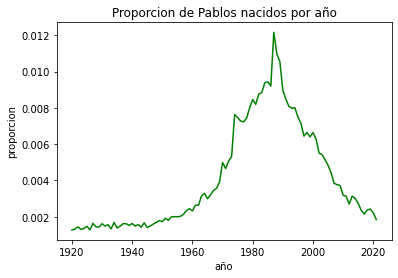

In [3]:
pablos = file[(file['nombre']==nombre_estudiado) & (file['sexo']==sexo_persona)]

x = pablos['anio']
yy = pablos['n']
y = pablos['proporcion']

plt.plot(x,y,'g')
#plt.plot(x,yy,'g')
plt.xlabel('año')
#plt.ylabel('n')
plt.ylabel('proporcion')
plt.title(f'Proporcion de {nombre_estudiado}s nacidos por año')
plt.show()

In [4]:
#pablos[(pablos['n']==pablos['n'].max())]
pablos[(pablos['proporcion']==pablos['proporcion'].max())]
#pablos[(pablos['anio']==1999)]

,anio,nombre,sexo,n,proporcion
450681,1987,Pablo,M,3387,0.01217


In [5]:
pablos[(pablos['anio']==1988)]

,anio,nombre,sexo,n,proporcion
461298,1988,Pablo,M,3262,0.010984


In [6]:
#nombres_ordenados = file.sort_values(by=['n'],ascending=False)
nombres_ordenados = file.sort_values(by=['proporcion'],ascending=False)

hombres_1999_top = nombres_ordenados[(nombres_ordenados['sexo']=='M') & (nombres_ordenados['anio']==1999)]

ranking = [i for i in range(1,len(hombres_1999_top)+1)]

hombres_1999_top['ranking'] = ranking



hombres_1999_top[(hombres_1999_top['ranking']<=21)]

c:\Users\pablo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,anio,nombre,sexo,n,proporcion,ranking
586025,1999,Nicolás,M,5999,0.023230,1
585131,1999,Matías,M,5177,0.020047,2
587045,1999,Sebastián,M,4712,0.018246,3
580484,1999,Diego,M,4046,0.015667,4
583338,1999,José,M,3611,0.013983,5
581223,1999,Felipe,M,3540,0.013708,6
583482,1999,Juan,M,2854,0.011052,7
579135,1999,Benjamín,M,2689,0.010413,8
579078,1999,Bastián,M,2569,0.009948,9
584637,1999,Luis,M,2559,0.009909,10


In [12]:
len(hombres_1999_top)

3908

In [7]:
#nombres_hombre = file[(file['sexo']=='M') & (file['anio']>=1920)]
#n_nombres_hombre = []
#nombres_hombre
nombres_ordenados_hombres = nombres_ordenados[(nombres_ordenados['sexo']=='M')]

norep_nombres_hombre = []

trim = nombres_ordenados_hombres.iloc[:50000,:]

nombres_hombre = trim['nombre']

nombres_hombre = set(list(nombres_hombre))

n_nombres_hombre = []
proporcion_nombres_hombre = []
std_nombres_hombre = []
registros_nombre_hombre = []
lb_nombres_hombre = []
ub_nombres_hombre = []

#i=1
#for nombre in nombres_hombre:
    #print(nombre,i)
    #n_nombres_hombre.append(trim[(trim['nombre']==nombre)]['n'].sum())
    #i+=1




i=1
for nombre in nombres_hombre:
    #print(nombre,i)
    df_nombre = trim[(trim['nombre']==nombre)] #entradas de nombre
    media = df_nombre['proporcion'].mean()
    proporcion_nombres_hombre.append(media) #media de las proporciones


    desviacion = df_nombre['proporcion'].std()
    #print(desviacion)
    std_nombres_hombre.append(desviacion) #desviacion de las proporciones
    suma_n = df_nombre['n'].sum()
    n_nombres_hombre.append(suma_n) #Registros del nombre a nivel histórico
    años_registrados = len(df_nombre)
    registros_nombre_hombre.append(años_registrados) #numero de años registrados

    lb = media - 1.96 *desviacion/np.sqrt(años_registrados)
    ub = media + 1.96 *desviacion/np.sqrt(años_registrados)

    lb_nombres_hombre.append(lb)
    ub_nombres_hombre.append(ub)
    #proporcion_nombres_hombre.append(trim[(trim['nombre']==nombre)]['proporcion'].mean())
    #std_nombres_hombre.append(trim[(trim['nombre']==nombre)]['proporcion'].std())
    #n_nombres_hombre.append(trim[(trim['nombre']==nombre)]['n'].sum())
    i+=1

#ranking_hombres_historico = {'nombre': list(nombres_hombre),
                            #'n': n_nombres_hombre}

ranking_hombres_historico = {'nombre': list(nombres_hombre),
                            'registros_nombre_hombre': registros_nombre_hombre,
                            'proportion_mean': proporcion_nombres_hombre,
                            'std': std_nombres_hombre,
                            'n': n_nombres_hombre,
                            'lb':lb_nombres_hombre,
                            'ub':ub_nombres_hombre}                            

ranking_hombres_historico = pd.DataFrame(ranking_hombres_historico)

#ranking_hombres_historico = ranking_hombres_historico.sort_values(by=['n'],ascending=False)
ranking_hombres_historico = ranking_hombres_historico.sort_values(by=['n'],ascending=False)

ranking_hombres_historico['ranking'] = [i for i in range(1,len(ranking_hombres_historico)+1)]



Celzo 1
Ronal 2
Nolverto 3
Hernaldo 4
Irenio 5
Maximus 6
Fidel 7
Flor 8
Filaderfo 9
Orfilio 10
Esay 11
Jiliberto 12
Heydan 13
Tadeo 14
Cristhian 15
Eudulio 16
Randy 17
Harold 18
Ulrich 19
Eric 20
Celso 21
Sixto 22
Segundo 23
Crisólogo 24
Buenaventura 25
Melecio 26
Vittorio 27
Sandro 28
Frantz 29
Thómas 30
Benjamín 31
Labes 32
Zaid 33
Ornaldo 34
Robustiano 35
Olivio 36
Sigisfredo 37
Vitalicio 38
Dastan 39
Nazael 40
Yordan 41
Felizardo 42
Giliberto 43
Jordan 44
Edgar 45
Noel 46
Adriano 47
Obdulio 48
Nabor 49
Yeison 50
Uberlindo 51
Gerhard 52
Benildo 53
Ruperto 54
Humberto 55
Zenon 56
Kenny 57
Máximo 58
Maickel 59
Gael 60
Edwin 61
Laban 62
Aarón 63
Juanjosé 64
Aparicio 65
Isaias 66
Gamaliel 67
Sandrino 68
Kaleth 69
Joaquin 70
Osvaldo 71
Román 72
Celerindo 73
Fermin 74
Brayam 75
Jesús 76
Próspero 77
William 78
Zahid 79
Daud 80
Helmut 81
Isaac 82
Crisanto 83
Cocier 84
Hans 85
Rudecindo 86
Medardo 87
Terencio 88
Adermo 89
Ramsés 90
Eloi 91
Eleazar 92
Demyan 93
Silvino 94
Adonai 95
Félix 96
E

In [8]:
ranking_hombres_historico[(ranking_hombres_historico['nombre']=='Pablo')]

,nombre,registros_nombre_hombre,proportion_mean,std,n,lb,ub,ranking
776,Pablo,102,0.004062,0.002852,106418,0.003509,0.004616,26


In [9]:
ranking_hombres_historico.head(30)

,nombre,registros_nombre_hombre,proportion_mean,std,n,lb,ub,ranking
826,José,102,0.030481,0.016040,588512,0.027368,0.033594,1
989,Juan,102,0.027698,0.013357,581458,0.025106,0.030290,2
1782,Luis,102,0.025053,0.013473,505769,0.022439,0.027668,3
1628,Carlos,102,0.013649,0.005805,293709,0.012522,0.014775,4
125,Jorge,102,0.010655,0.004796,239076,0.009724,0.011586,5
1060,Manuel,102,0.010905,0.006289,207603,0.009685,0.012126,6
1151,Francisco,102,0.007936,0.002599,182156,0.007431,0.008440,7
965,Víctor,102,0.007614,0.003277,173727,0.006978,0.008250,8
1592,Pedro,102,0.008378,0.004453,161535,0.007514,0.009242,9
1159,Cristian,94,0.006030,0.007008,160269,0.004613,0.007446,10
